# Assignment 1

We're doing text analysis to compare word frequencies between works by the same author, by different authors, and noting what differences in preferred words we can observe.

## Comparing word frequencies between two works of a single author.

I've chosen White Fang and the Call of the Wild by Jack London

In [5]:
# initial imports
import requests, re, nltk
from bs4 import BeautifulSoup
from nltk import clean_html
from collections import Counter
import operator

# removing stop words
stop_words = nltk.corpus.stopwords.words('english') + [
 'ut', '\'re','.', ',', '--', '\'s', '?', ')', '(', ':', '\'',
 '\"', '-', '}', '{', '&', '|', u'\u2014' ]

# function to remove html markup
def cleanHtml (html):
    from bs4 import BeautifulSoup
    soup = BeautifulSoup(html, 'html.parser')
    return soup .get_text()

# function to remove special characters, quotes, etc. from each word
def cleanWord (w):
    wn = re.sub('[,"\.\'&\|:@>*;/=]', "", w)
    return re.sub('^[0-9\.]*$', "", wn)
       
# define a function to get text/clean/calculate frequency
def get_wf (URL):
    # first get the web page
    r = requests .get(URL)
    
    # Now clean
    # remove html markup
    t = cleanHtml (r .text) .lower()
    
    # split string into an array of words using any sequence of spaces "\s+" 
    wds = re .split('\s+',t)
    
    # remove periods, commas, etc stuck to the edges of words
    for i in range(len(wds)):
        wds [i] = cleanWord (wds [i])
    
    # remove empty words
    wds = [i for i in wds if i != ""]
    
    # Calculate word frequencies
    wf = Counter (wds)
    
    # Remove stop words from the dictionary wf
    for k in stop_words:
        wf. pop(k, None)
        
    #how many regular words in the document?
    tw = 0
    for w in wf:
       tw += wf[w] 
        
    # Get ordered list
    wfs = sorted (wf .items(), key = operator.itemgetter(1), reverse=True)
    ml = min(len(wfs),15)

    #Reverse the list because barh plots items from the bottom
    return (wfs [ 0:ml ] [::-1], tw)

In [6]:
# Now populate two lists    
(wf_ee, tw_ee) = get_wf('https://www.gutenberg.org/files/910/910-h/910-h.htm') # White Fang
(wf_bu, tw_bu) = get_wf('https://www.gutenberg.org/files/215/215-h/215-h.htm') # The Call of the Wild

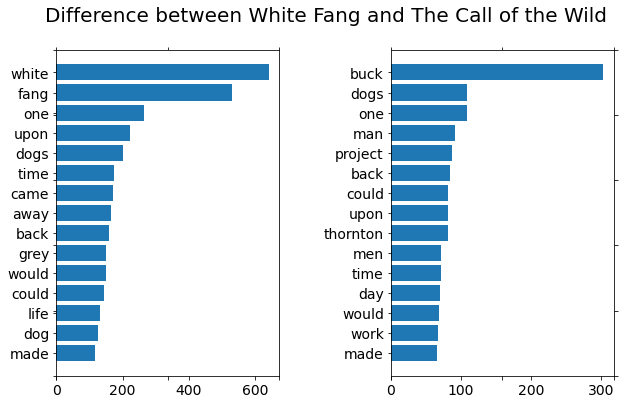

In [7]:
#Plot the results
import numpy as np
import pylab
import matplotlib.pyplot as plt

%matplotlib inline
def plotTwoLists (wf_ee, wf_bu, title):
    f = plt.figure (figsize=(10, 6))
    f .suptitle (title, fontsize=20)
    ax = f.add_subplot(111)
    ax .spines ['top'] .set_color ('none')
    ax .spines ['bottom'] .set_color ('none')
    ax .spines ['left'] .set_color ('none')
    ax .spines ['right'] .set_color ('none')
    ax .tick_params (labelcolor='w', top='off', bottom='off', left='off', right='off', labelsize=20)

    # Create two subplots, this is the first one
    ax1 = f .add_subplot (121)
    plt .subplots_adjust (wspace=.5)

    pos = np .arange (len(wf_ee)) 
    ax1 .tick_params (axis='both', which='major', labelsize=14)
    pylab .yticks (pos, [ x [0] for x in wf_ee ])
    ax1 .barh (range(len(wf_ee)), [ x [1] for x in wf_ee ], align='center')

    ax2 = f .add_subplot (122)
    ax2 .tick_params (axis='both', which='major', labelsize=14)
    pos = np .arange (len(wf_bu)) 
    pylab .yticks (pos, [ x [0] for x in wf_bu ])
    ax2 .barh (range (len(wf_bu)), [ x [1] for x in wf_bu ], align='center')

plotTwoLists (wf_ee, wf_bu, 'Difference between White Fang and The Call of the Wild')

## Comparing word frequencies between works of two authors.

The second author is Charles Dickens - A tale of two cities. We'd compare the word frequencies against White Fang and the Call of the Wild by Jack London

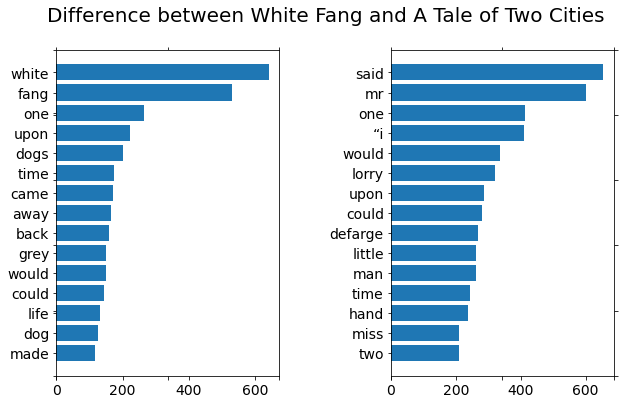

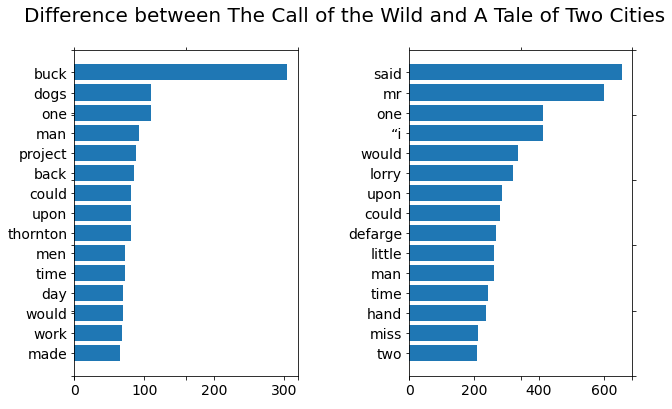

In [4]:
# we will use the same functions defined above.

# populating a list 
(wf_tc, tw_tc) = get_wf('https://www.gutenberg.org/files/98/98-h/98-h.htm') # A Tale of Two Cities by Charles Dickens


# plotting the graphs for the list
plotTwoLists (wf_ee, wf_tc, 'Difference between White Fang and A Tale of Two Cities')
plotTwoLists (wf_bu, wf_tc, 'Difference between The Call of the Wild and A Tale of Two Cities')

# Project Analysis

### 1. What is the question?

Ans: Does the writing style or words used by the same author change siginifcantly in multiple works? Is there a noticeable difference between works of different authors?

### 2. What was the approach?

Ans: Using the sample text parser, I inputed the dataset into the functions to see the results between the two works of Jack London. I then compared but his works with Charles Dicken's A tale of 2 cities which was released in similar peiords.

### 3. What problems did I encounter?

Ans: The function load time was too slow for a much larger file I initially wanted to use, so I chose a shorter file to help the performance. 

### 4. What results did I get?

Ans: Jack London's White Fang had the most used word ("white") used over 600 times with the most used word ("buck") of The Call of the Wild being half of that. There were some common words between the two works - "one", "dogs", "would", "upon".
Dickens uses words similar to London, such as "one", "would" - however those are common english words and may be reminiscent of the time period.

### 5. What new ideas did this generate?

Ans: This project inspired to do analysis of old-time English movies or perhaps spanish movies to see how the results and word count for that would turn out. Also, I'd use a different format of the dataset possibly .npy files to avoid long load times